In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
encodings = ['utf-8', 'latin1', 'iso-8859-1']

for encoding in encodings:
    try:
        df = pd.read_csv('news.csv', encoding=encoding)
        print(f"Successfully read CSV file with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read CSV file with encoding: {encoding}")

print(df.head(5))


Failed to read CSV file with encoding: utf-8
Successfully read CSV file with encoding: latin1
      unit_id                                      article_title  \
0  1914947530  Syria attack symptoms consistent with nerve ag...   
1  1914947532  Homs governor says U.S. attack caused deaths b...   
2  1914947533    Death toll from Aleppo bomb attack at least 112   
3  1914947534        Aleppo bomb blast kills six Syrian state TV   
4  1914947535  29 Syria Rebels Dead in Fighting for Key Alepp...   

                                     article_content source       date  \
0  Wed 05 Apr 2017 Syria attack symptoms consiste...    nna   4/5/2017   
1  Fri 07 Apr 2017 at 0914 Homs governor says U.S...    nna   4/7/2017   
2  Sun 16 Apr 2017 Death toll from Aleppo bomb at...    nna  4/16/2017   
3  Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...    nna  4/19/2017   
4  Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...    nna  7/10/2016   

  location  labels  
0    idlib       0  
1     homs

In [ ]:
df.shape

(804, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   unit_id          804 non-null    int64 
 1   article_title    804 non-null    object
 2   article_content  804 non-null    object
 3   source           804 non-null    object
 4   date             804 non-null    object
 5   location         804 non-null    object
 6   labels           804 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 44.1+ KB


In [ ]:
df.columns

Index(['unit_id', 'article_title', 'article_content', 'source', 'date',
       'location', 'labels'],
      dtype='object')

In [ ]:
df.nunique().to_frame(name='Count of unique values')


,Count of unique values
unit_id,792
article_title,774
article_content,789
source,15
date,423
location,12
labels,2


In [ ]:
df.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
unit_id,"[1914947530, 1914947532, 1914947533, 191494753..."
article_title,[Syria attack symptoms consistent with nerve a...
article_content,[Wed 05 Apr 2017 Syria attack symptoms consist...
source,"[nna, alaraby, asharqalawsat, dailysabah, trt,..."
date,"[4/5/2017, 4/7/2017, 4/16/2017, 4/19/2017, 7/1..."
location,"[idlib, homs, aleppo, hasakeh, raqqa, lattakia..."
labels,"[0, 1]"


In [ ]:
df.isnull().sum()

unit_id            0
article_title      0
article_content    0
source             0
date               0
location           0
labels             0
dtype: int64

In [ ]:
dup_news=df[df.duplicated()].sum()
print(dup_news)

unit_id                                                   3852958098
article_title      6 citizens killed 22 injured in terrorist atta...
article_content    18 November 2016 6 citizens killed 22 injured ...
source                                                      sanasana
date                                            11/18/201611/18/2016
location                                                aleppoaleppo
labels                                                             0
dtype: object


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
dup_news=df[df.duplicated()].sum()
print(dup_news)

unit_id            0.0
article_title      0.0
article_content    0.0
source             0.0
date               0.0
location           0.0
labels             0.0
dtype: float64


In [ ]:
df.shape

(802, 7)

In [ ]:
df.drop(['unit_id'], axis=1, inplace=True)

In [ ]:
counts = df['labels'].value_counts()
print("Total Number of News:", counts.sum())
print("Number of Fake News:", counts[0])
print("Number of Real News:", counts[1])


Total Number of News: 802
Number of Fake News: 376
Number of Real News: 426


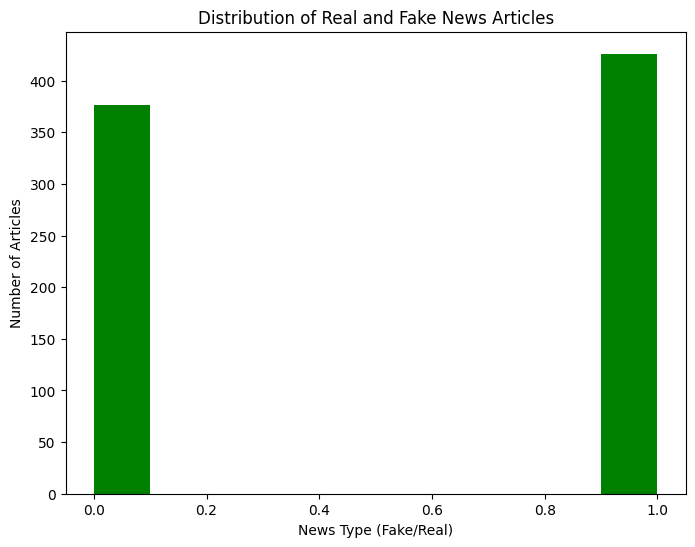

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df['labels'], color='green')
plt.ylabel('Number of Articles')
plt.xlabel("News Type (Fake/Real)")
plt.title("Distribution of Real and Fake News Articles")
plt.show()

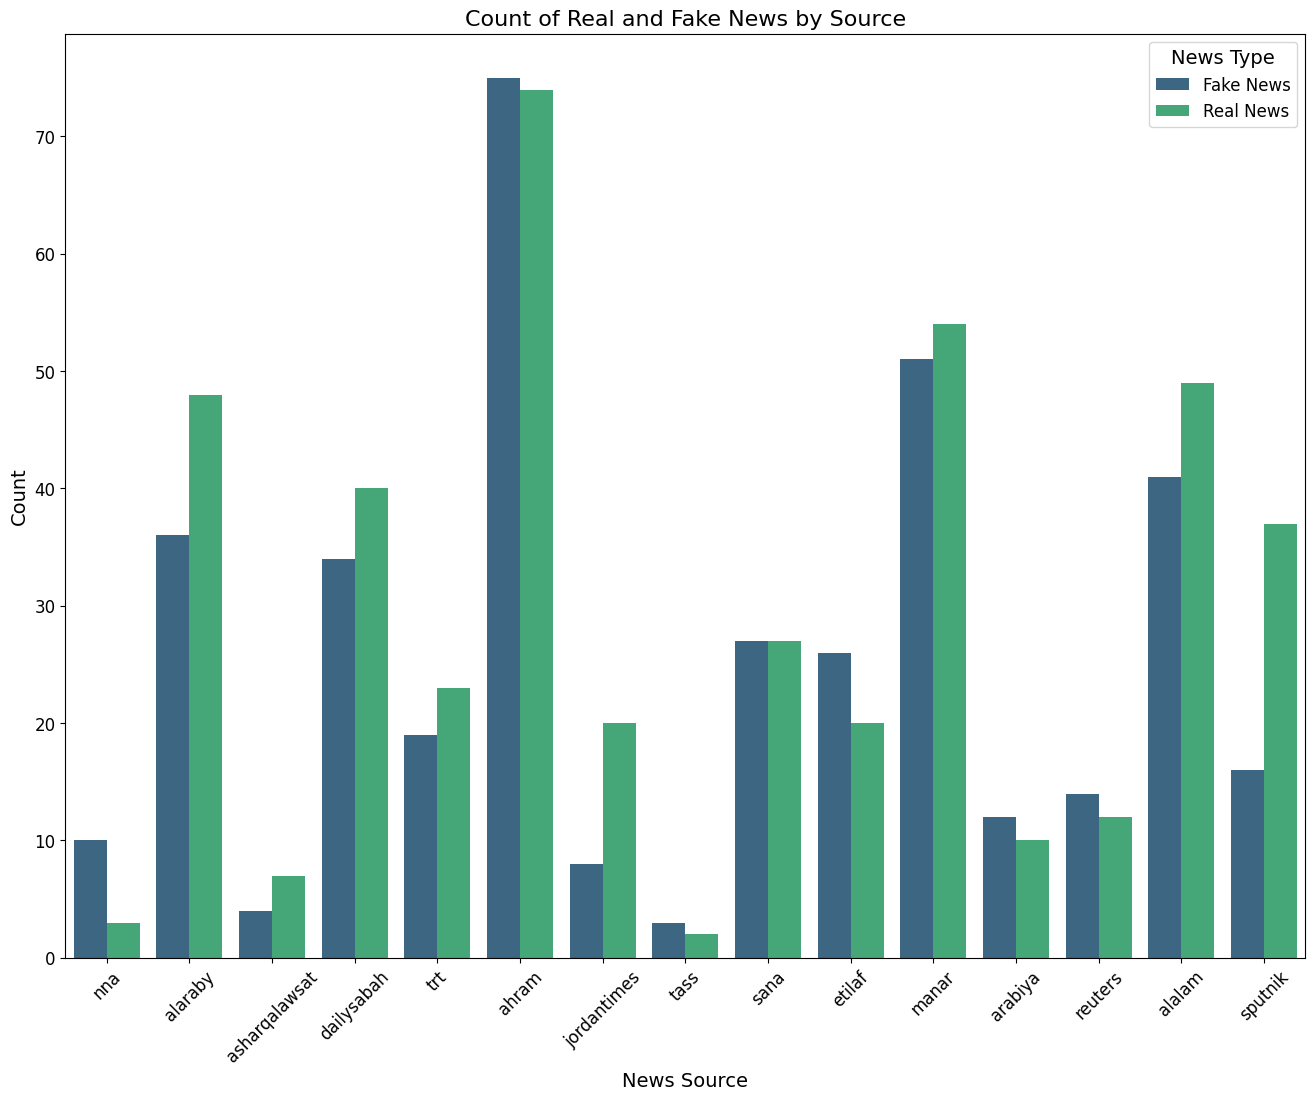

In [ ]:
plt.figure(figsize=(16,12))
sns.countplot(x=df['source'], hue=df['labels'], palette="viridis")
plt.xlabel('News Source', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Real and Fake News by Source', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(title='News Type', labels=['Fake News', 'Real News'], fontsize=12, title_fontsize=14)
plt.show()


In [ ]:
df['year'] = pd.to_datetime(df['date']).dt.year
yearly_counts = df.groupby(['year', 'labels']).size().unstack(fill_value=0)

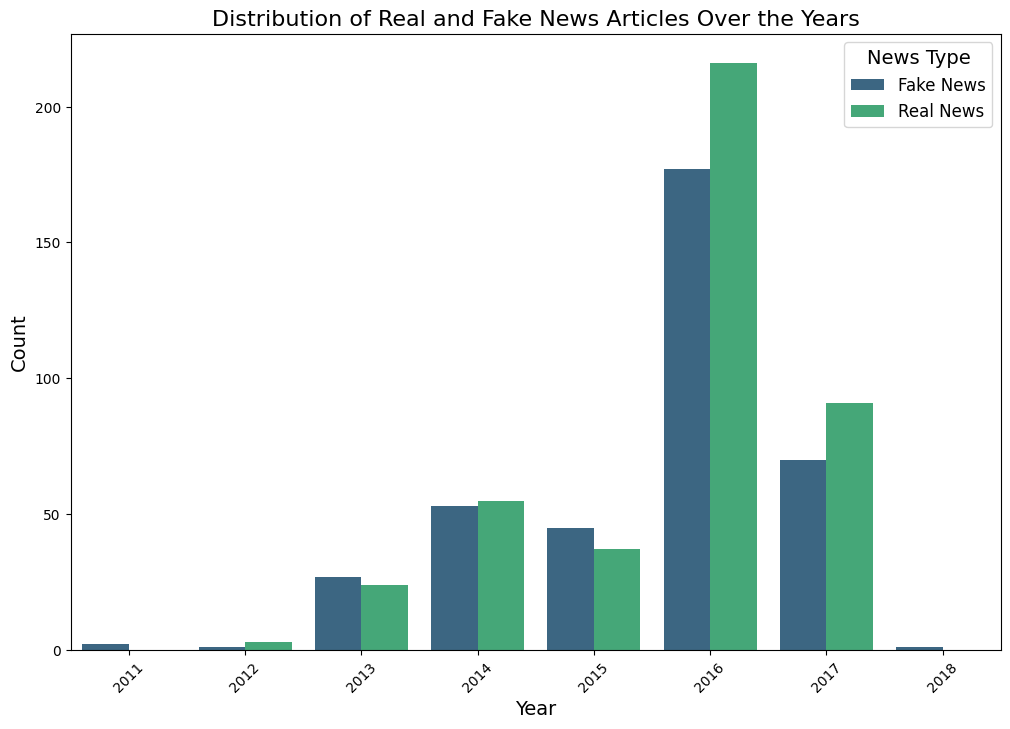

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='year', hue='labels', data=df, palette='viridis')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Real and Fake News Articles Over the Years', fontsize=16)
plt.xticks(rotation=45)
plt.legend(title='News Type', labels=['Fake News', 'Real News'], fontsize=12, title_fontsize=14)
plt.show()

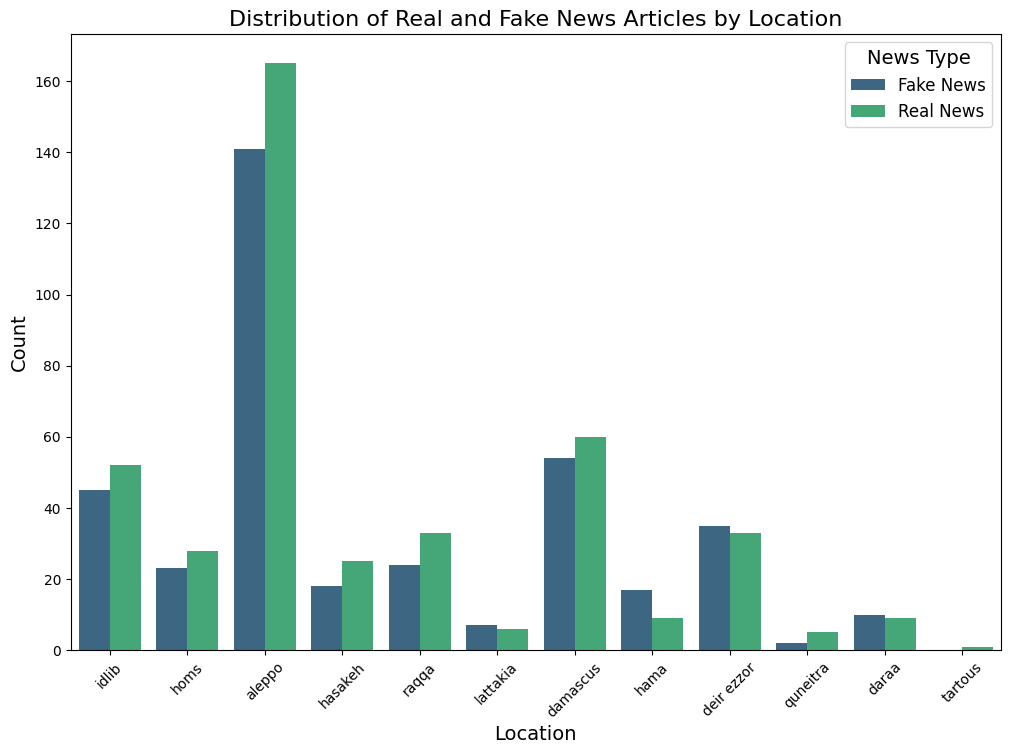

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='location', hue='labels', data=df, palette='viridis')
plt.xlabel('Location', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Real and Fake News Articles by Location', fontsize=16)
plt.xticks(rotation=45)
plt.legend(title='News Type', labels=['Fake News', 'Real News'], fontsize=12, title_fontsize=14)
plt.show()

## Data Cleaning

In [ ]:
def combine_text(row):
    return row['article_title'] + ' ' + row['article_content']

df['text'] = df.apply(combine_text, axis=1)
df.drop(columns=['article_title', 'article_content'], inplace=True)

df.head()

,source,date,location,labels,year,text
0,nna,4/5/2017,idlib,0,2017,Syria attack symptoms consistent with nerve ag...
1,nna,4/7/2017,homs,0,2017,Homs governor says U.S. attack caused deaths b...
2,nna,4/16/2017,aleppo,0,2017,Death toll from Aleppo bomb attack at least 11...
3,nna,4/19/2017,aleppo,0,2017,Aleppo bomb blast kills six Syrian state TV We...
4,nna,7/10/2016,aleppo,0,2016,29 Syria Rebels Dead in Fighting for Key Alepp...


In [ ]:
df.drop(columns=['date', 'location', 'source','year'], inplace=True)
df.head()

,labels,text
0,0,Syria attack symptoms consistent with nerve ag...
1,0,Homs governor says U.S. attack caused deaths b...
2,0,Death toll from Aleppo bomb attack at least 11...
3,0,Aleppo bomb blast kills six Syrian state TV We...
4,0,29 Syria Rebels Dead in Fighting for Key Alepp...


In [ ]:
df['text'][0]

'Syria attack symptoms consistent with nerve agent use WHO Wed 05 Apr 2017 Syria attack symptoms consistent with nerve agent use WHO. Victims of a suspected chemical attack in Syria appeared to show symptoms consistent with reaction to a nerve agent the World Health Organization said on Wednesday. "Some cases appear to show additional signs consistent with exposure to organophosphorus chemicals a category of chemicals that includes nerve agents" WHO said in a statement putting the death toll at at least 70. The United States has said the deaths were caused by sarin nerve gas dropped by Syrian aircraft. Russia has said it believes poison gas had leaked from a rebel chemical weapons depot struck by Syrian bombs. Sarin is an organophosporus compound and a nerve agent. Chlorine and mustard gas which are also believed to have been used in the past in Syria are not. A Russian Defence Ministry spokesman did not say what agent was used in the attack but said the rebels had used the same chemic

In [ ]:
from nltk.corpus import stopwords


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
df['text'][0]

'Syria attack symptoms consistent nerve agent use Wed 05 Apr 2017 Syria attack symptoms consistent nerve agent use WHO. Victims suspected chemical attack Syria appeared show symptoms consistent reaction nerve agent World Health Organization said Wednesday. "Some cases appear show additional signs consistent exposure organophosphorus chemicals category chemicals includes nerve agents" said statement putting death toll least 70. United States said deaths caused sarin nerve gas dropped Syrian aircraft. Russia said believes poison gas leaked rebel chemical weapons depot struck Syrian bombs. Sarin organophosporus compound nerve agent. Chlorine mustard gas also believed used past Syria not. Russian Defence Ministry spokesman say agent used attack said rebels used chemical weapons Aleppo last year. said likely kind chemical used attack sufferers apparent external injuries died rapid onset similar symptoms including acute respiratory distress. said experts Turkey giving guidance overwhelmed he

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
fake_news = df[df['labels'] == 0]['text'].str.cat(sep=' ')
real_news = df[df['labels'] == 1]['text'].str.cat(sep=' ')

In [ ]:
fake_tokens = word_tokenize(fake_news)
real_tokens = word_tokenize(real_news)
fake_tokens = [word.lower() for word in fake_tokens if word.isalpha() and word.lower() not in stop_words]
real_tokens = [word.lower() for word in real_tokens if word.isalpha() and word.lower() not in stop_words]

In [ ]:
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(fake_tokens))
real_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(real_tokens))

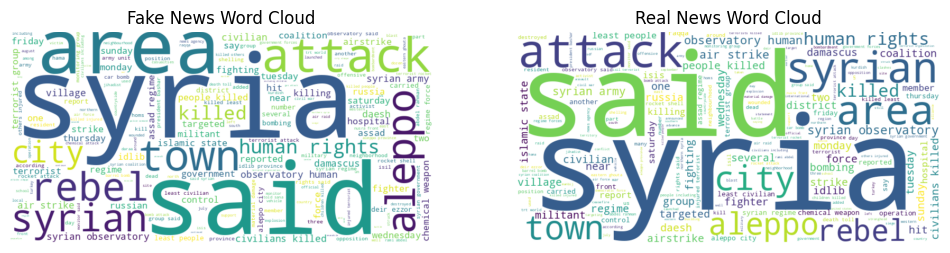

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Fake News Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Real News Word Cloud')
plt.axis('off')

plt.show()

In [239]:
nltk.download('wordnet')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words]

    text = ' '.join(words)

    return text

df['text']=df['text'].apply(clean_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [240]:
df['text'][0]

'syria attack symptom consistent nerve agent use wed apr syria attack symptom consistent nerve agent use who victim suspected chemical attack syria appeared show symptom consistent reaction nerve agent world health organization said wednesday some case appear show additional sign consistent exposure organophosphorus chemical category chemical includes nerve agent said statement putting death toll least united state said death caused sarin nerve gas dropped syrian aircraft russia said belief poison gas leaked rebel chemical weapon depot struck syrian bomb sarin organophosporus compound nerve agent chlorine mustard gas also believed used past syria not russian defence ministry spokesman say agent used attack said rebel used chemical weapon aleppo last year said likely kind chemical used attack sufferer apparent external injury died rapid onset similar symptom including acute respiratory distress said expert turkey giving guidance overwhelmed health worker idlib diagnosis treatment patien

In [243]:
cleaned_news = df.copy()
cleaned_news.to_csv('cleaned_news.csv', index=False)